In this notebook we show how you can get publicly available data directly "into python". 

We will use [pandas datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) to get data from a number of sources. Look at the documentation to see which sources are available and how to retrieve them from the web. In fact, there is also a [datacamp course](https://www.datacamp.com/courses/importing-managing-financial-data-in-python) on this. Here I give a brief overview of the possibilities.

First, you need to install this datareader. The instructions can be found [here](https://pandas-datareader.readthedocs.io/en/latest/index.html). If you use the anaconda python distribution, you can type in a shell/terminal/command prompt: \`conda install pandas-datareader\`. 




# Financial data



We first import a number of libraries that we need below. Pandas is the main library in python to deal with datasets. On datacamp there are a number of introductions to pandas. These are highly recommended when you want to work with data.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from datetime import date # Date & time functionality
%matplotlib inline

Now we are going to use datareader to import data from Google (specified in `data_source`). The data we import is stockmarket data for Google (specified in `ticker`). We specify the start-date and the end-date for our data.

The data is read into `stock_data`.



In [1]:
start = date(2015, 1, 1)
end = date(2016, 12, 31)
ticker = 'GOOG'
data_source = 'google'
stock_data = DataReader(ticker, data_source, start, end)

To get an idea of the data that we just imported from the web, let's look at the first five lines of the file. This we do with the `.head()` method.



In [1]:
stock_data.head()

Open    High     Low   Close   Volume
Date                                               
2015-01-02  529.01  531.27  524.10  524.81  1446662
2015-01-05  523.26  524.33  513.06  513.87  2054238
2015-01-06  515.00  516.18  501.05  501.96  2891950
2015-01-07  507.00  507.24  499.65  501.10  2059366
2015-01-08  497.99  503.48  491.00  502.68  3344395

Let's plot the closing price for each date. We can plot with matplotlib, but we can also plot directly "from the pandas dataframe". We specify which variable we want to plot and can give some options (like the title of the graph).



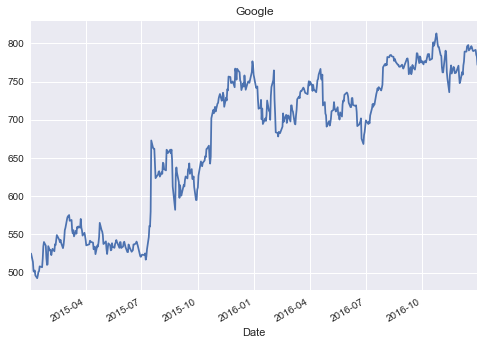

In [1]:
plt.style.use('seaborn')
stock_data['Close'].plot(title='Google')

Hence, this is a quick way to get an idea of your data. We can also plot two (or more) variable by specifying a list of the variables we want to plot.



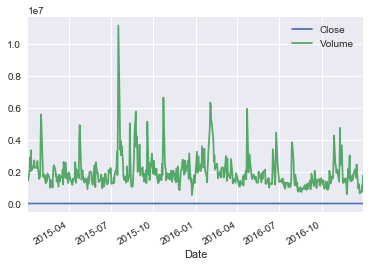

In [1]:
stock_data[['Close','Volume']].plot()

Because volume and price are of different magnitudes, this graph is not so informative&#x2026;

But we can specify that we want different $y$-axes for different variables. This we do as follows.



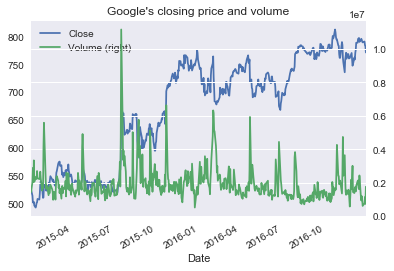

In [1]:
stock_data[['Close','Volume']].plot(secondary_y='Volume',title="Google's closing price and volume")

We can also use matplotlib to make figures with the data in our dataframe. The following code plots volume against closing price in a scatter plot. If you would like to use the figure in another application (well, not Word obviously&#x2026;), you can save it. You can save figures in a number of formats, here we choose png. The figure is saved in the directory where the notebook is.



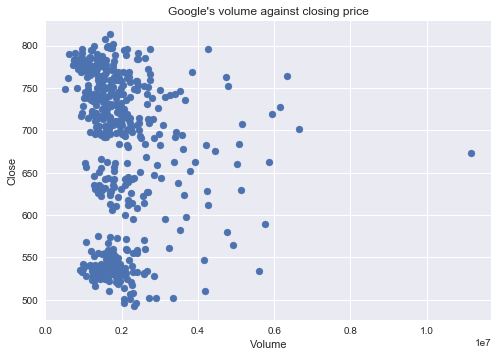

In [1]:
plt.scatter(stock_data.Volume,stock_data.Close)
plt.xlabel('Volume')
plt.ylabel('Close')
plt.title("Google's volume against closing price")
plt.show()
plt.savefig('Google_Volume_Price.png')

You can also manipulate the data. E.g. add a column 'trade' (defined as volume times the closing price):



In [1]:
stock_data['Trade']=stock_data['Volume']*stock_data['Close']
stock_data.head()

Open    High     Low   Close   Volume         Trade
Date                                                             
2015-01-02  529.01  531.27  524.10  524.81  1446662  7.592227e+08
2015-01-05  523.26  524.33  513.06  513.87  2054238  1.055611e+09
2015-01-06  515.00  516.18  501.05  501.96  2891950  1.451643e+09
2015-01-07  507.00  507.24  499.65  501.10  2059366  1.031948e+09
2015-01-08  497.99  503.48  491.00  502.68  3344395  1.681160e+09

Now suppose that you are really happy with your data and you want to save it. One option is to save your data as a csv-file. Google 'pandas write to csv' to find a way to do this.



In [1]:
stock_data.to_csv('google_data.csv')

---

**Exercise**

Google to find a way to solve the dataframe to an excel file. (don't ask me why you would need to do that)

---




## Getting data on a number of companies



Getting data on one company is fine, but often you may be interested in a number of companies. Then you can google to find out how to import data with datareader on a number of companies at the same time. The [link here](https://stackoverflow.com/questions/28174193/add-new-column-based-on-a-list-and-sort-date-by-newest/28210920#28210920) gives the following solution.

First, specify a python list with the tickers for the companies that you are interested in (can you guess which companies these are? if not google the tickers). Then we define a loop where we go over each of these tickers and use datareader to get the data. As we have more than one company, we need to keep track which rows of data relate to which company. Hence we add a column `Symbol` to the dataframe. Then we "put all the dataframes together" using `concat` and sort the data. Finally, we save the data to a csv file.



In [1]:
symbols_list = ['AAPL', 'TSLA', 'GOOG']

symbols=[]
for ticker in symbols_list: 
    r = DataReader(ticker, 'yahoo', start, end)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)
# concatenate all the dfs
df_stocks = pd.concat(symbols)
#define cell with the columns that i need
cell= df_stocks[['Symbol','Open','High','Low','Adj Close','Volume']]
#changing sort of Symbol (ascending) and Date(descending) setting Symbol as first column and changing date format
cell.reset_index().sort(['Symbol', 'Date'], ascending=[1,0]).set_index('Symbol').to_csv('stock.csv', date_format='%d/%m/%Y')

Note that dataframe `df_stocks` has a panel structure: we have time series data on a number of companies. To get a first idea what it looks like, consider the first 10 rows.

---

**Exercise**

Type the python/pandas code to see the first 10 lines of the data.



---

To get a first idea of the data, we can compare the average values (over our data-period) of our variables for the three companies. Pandas has the `groupy` method to do this. You specify the variable on which you want to group and then the method with which you want to summarize the data (like mean, standard deviation, sum, min, max etc.)



In [1]:
df_stocks.groupby('Symbol').mean()

Open        High         Low       Close   Adj Close    Volume
Symbol                                                                      
AAPL    112.342713  113.335446  111.274574  112.318158  108.674161  45119018
GOOG    672.611522  678.140533  666.562108  672.453545  672.453545   1949443
TSLA    219.951426  223.412079  216.290218  219.910040  219.910040   4460271

Clearly google's shares trade at higher prices than the other two companies.

When you looked at the first ten rows of the dataframe, you will have noticed that the companies are simply in different rows. This may not always be the optimal way to deal with the data. Another way to work with the data is that rows consist of dates only and the different columns are indexed by company. Hence, we get an opening price for each company, a highest price for each company etc. 

In pandas this is easy to do. We add the company ticker (in the column `Symbol`) to the index (which currently consists of `Date` only). Now each row has a unique index. 

---

**Exercise**

Why was there not a unique index for each row above?

---

Then we "unstack" the data on the column (now part of the index) `Symbol`.



In [1]:
df_stocks_unstacked = df_stocks.set_index('Symbol', append=True).unstack(level='Symbol')

---

**Exercise**

Look at the first 5 rows of this new dataframe.



---

We plot the closing price with the unstacked data.



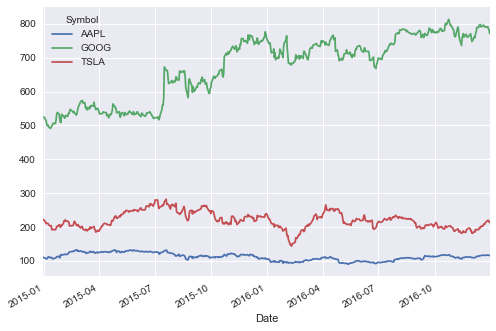

In [1]:
df_stocks_unstacked['Close'].plot()

---

**Exercise**

Save the dataframe `df_stocks` to a csv file.



---




# Economic series



From the Federal Reserve Bank of St. Louis we can also retrieve data.

Suppose we are interested in GDP. Go to the [website](https://fred.stlouisfed.org/) and type GDP on the top right of the page "Search FRED". Then select the GDP series that you want. We clicked on [this one](https://fred.stlouisfed.org/series/A191RL1Q225SBEA). The title reads "Real Gross Domestic Product (A191RL1Q225SBEA)"; the expression in brackets is the name we need for python to retrieve this data. If we do not set an end-date in \`DataReader\`, it goes up to the last observation.



In [1]:
series_code = 'A191RL1Q225SBEA' 
data_source = 'fred'
gdp_data = DataReader(series_code, data_source, date(1947,4,1))
gdp_data.head()

A191RL1Q225SBEA
DATE                       
1947-04-01             -0.4
1947-07-01             -0.4
1947-10-01              6.4
1948-01-01              6.0
1948-04-01              6.7

This is quarterly data and measures the percent change from the previous period.

---

**Exercise**

Plot this series of GDP and add "Percentage change in US GDP" in the title of the graph.



---

We can also combine datasets from different sources. We are going to add an interest rate to our google stock data. Go to this [website](https://fred.stlouisfed.org/series/DGS10) for the 10-year treasury rate.

---

**Exercise**

Complete the cell below to read the data into `data_10_year`.



In [1]:
series_code = ''
data_source = ''
data_10_year = DataReader(series_code, data_source, start,end)

---

The `series_code` is not the most intuitive name to use. Hence, we are going to rename it.



In [1]:
series_name = '10-year Treasury'
data_10_year = data_10_year.rename(columns={series_code: series_name})

---

**Exercise**

Plot the dataframe `data_10_year`.



---

We combine the treasury data with the google share price. We do this with the `concat` method from pandas. "axis=1" means that we add columns together into the new dataframe `combined data`.



In [1]:
combined_data = pd.concat([stock_data['Close'], data_10_year], axis=1)
combined_data.head()

---

**Exercise**

Plot the dataframe `combined_data`. Notice that you need to add a second y-axis for this graph to be informative.



---

If you are interested in competition in the banking sector, I highly recommend the following data series from this website: DDOI05USA156NWDB




# API



A number of institutes actually have an API (application programming interface) to retrieve their data. Whereas `datareader` as used above is a generic reader for a number of sources. An API giving you more options may exist. Simply google to see whether such an API exists for the data that you are interested in.

To illustrate this, we use the World Bank API `wbdata` that can be found [here](http://wbdata.readthedocs.io/en/latest/). Currently this is not (yet) available on anaconda. Hence, you can install it with \`pip install wbdata\`.

The World Bank uses country codes and there is a search function to find the relevant code.



In [1]:
import wbdata as wbdata
wbdata.search_countries("united")

ARE	United Arab Emirates
GBR	United Kingdom
USA	United States

In [1]:
wbdata.get_source()

11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment
41	Country Partnership Strategy for India (FY2013 - 17)
1 	Doing Business
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
12	Education Statistics
13	Enterprise Surveys
28	Global Financial Inclusion
33	G20 Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	Global Economic Prospects
32	Global Financial Development
21	Global Economic Monitor Commodities
55	Commodity Prices- History and Projections
34	Global Partnership for Education
29	The Atlas of Social Protection: Indicators of Resilience and Equity
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
40	Population estimates and projections
18	IDA Results Measurement System
45	Indonesia Database for Policy and Economic Research
6 	International Debt Statistics
54	Joint External Debt Hub
25	Jobs
37	LAC Equity Lab
19	M

Suppose you are interested in "World Development Indicators", then you type:



In [1]:
wbdata.get_indicator(source=2)

Let's say we are interested in gdp per capita. Then we type something like:



In [1]:
wbdata.search_indicators("gdp per capita")

6.0.GDPpc_constant       GDP per capita, PPP (constant 2011 international $) 
FB.DPT.INSU.PC.ZS       	Deposit insurance coverage (% of GDP per capita)
NY.GDP.PCAP.PP.KD.ZG    	GDP per capita, PPP annual growth (%)
NY.GDP.PCAP.PP.KD.87    	GDP per capita, PPP (constant 1987 international $)
NY.GDP.PCAP.PP.KD       	GDP per capita, PPP (constant 2011 international $)
NY.GDP.PCAP.PP.CD       	GDP per capita, PPP (current international $)
NY.GDP.PCAP.KN          	GDP per capita (constant LCU)
NY.GDP.PCAP.KD.ZG       	GDP per capita growth (annual %)
NY.GDP.PCAP.KD          	GDP per capita (constant 2010 US$)
NY.GDP.PCAP.CN          	GDP per capita (current LCU)
NY.GDP.PCAP.CD          	GDP per capita (current US$)
NV.AGR.PCAP.KD.ZG       	Real agricultural GDP per capita growth rate (%)
SE.XPD.TERT.PC.ZS       	Government expenditure per tertiary student as % of GDP per capita (%)
SE.XPD.SECO.PC.ZS       	Government expenditure per student, secondary (% of GDP per capita)
SE.XPD.PRIM.PC.Z

In [1]:
data_date = (date(2010, 1, 1), date(2017, 1, 1))
indicators = {"SE.XPD.PRIM.PC.ZS": "Government_expenditure_primary", "NY.GDP.PCAP.KD": "GDP_pc"}
df_wb = wbdata.get_dataframe(indicators, country=("USA", "GBR"), data_date=data_date)
df_wb.describe()

GDP_pc  Government_expenditure_primary
count     14.000000                        9.000000
mean   45098.062774                       22.049704
std     5429.684695                        1.919101
min    38709.911662                       19.784019
25%    39937.246151                       20.564369
50%    44988.430314                       22.099590
75%    49856.868038                       23.206720
max    52194.885762                       24.909451

To get an idea of what the data looks like, consider the first 5 rows.



In [1]:
df_wb.head()

GDP_pc  Government_expenditure_primary
country        date                                              
United Kingdom 2016  41602.981812                             NaN
               2015  41183.933842                             NaN
               2014  40621.313068                        22.45294
               2013  39709.223846                        23.20672
               2012  39226.336499                             NaN

As you can see this data set already has an index consisting of year and country. Now we want to have a single index (date) and columns for each country.

---

**Exercise** 

Use the unstack method to create a new dataframe `df_wb_unstacked`.



Plot \`GDP\_pc\` for each country.



---

